In [1]:
import re
from typing import Any, Dict, List, Optional, Union
import pandas as pd
import numpy as np
from enum import auto, Enum
from datetime import datetime, date
from scipy import stats

# 二項検定

binom_test(成功数, 試行回数, 成功確率)

どういう場合に使用するのか？
A 薬が 0.6 の確率で成功する。B 薬を作成して試してもらったところ、20人中14人に効き目があった。</br>
この場合、A薬とB薬は一緒の有効効果なのか？（Bの薬の方が効き目があるのか？）


今回の場合は、0.49 で5%以上なので棄却することができない。

<参考資料>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

In [ ]:

# 参考資料
p = stats.binom_test(14, 20, 0.6)
print(p)

0.4946734686214292


<ipython-input-11-d076854aae9d>:3: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p = stats.binom_test(14, 20, 0.6)


# ウィルコクソンの順位和検定

- ノンパラメトリック検定（事前に確率分布がわかっていなくても使用することができる。）
- 観測できるデータが連続値であれば使用することができる。
- AグループとBグループが（どんな分布かはわかんないけど）同じ分布だったら、AとBグループからそれぞれ取ってきた観測値を合わせて順番に並べても混ざりあっているが、もし違う分布であればAグループの観測値が順位が高く（低く）Bグループの順位が低く（高く）観測されるはず。
- これもp値が5%以下であれば有意性がある。
- 無作為に抽出されている必要がある。
- グループ同士で観測数（サンプルサイズ）が異なっていても可能![1000006386.jpg](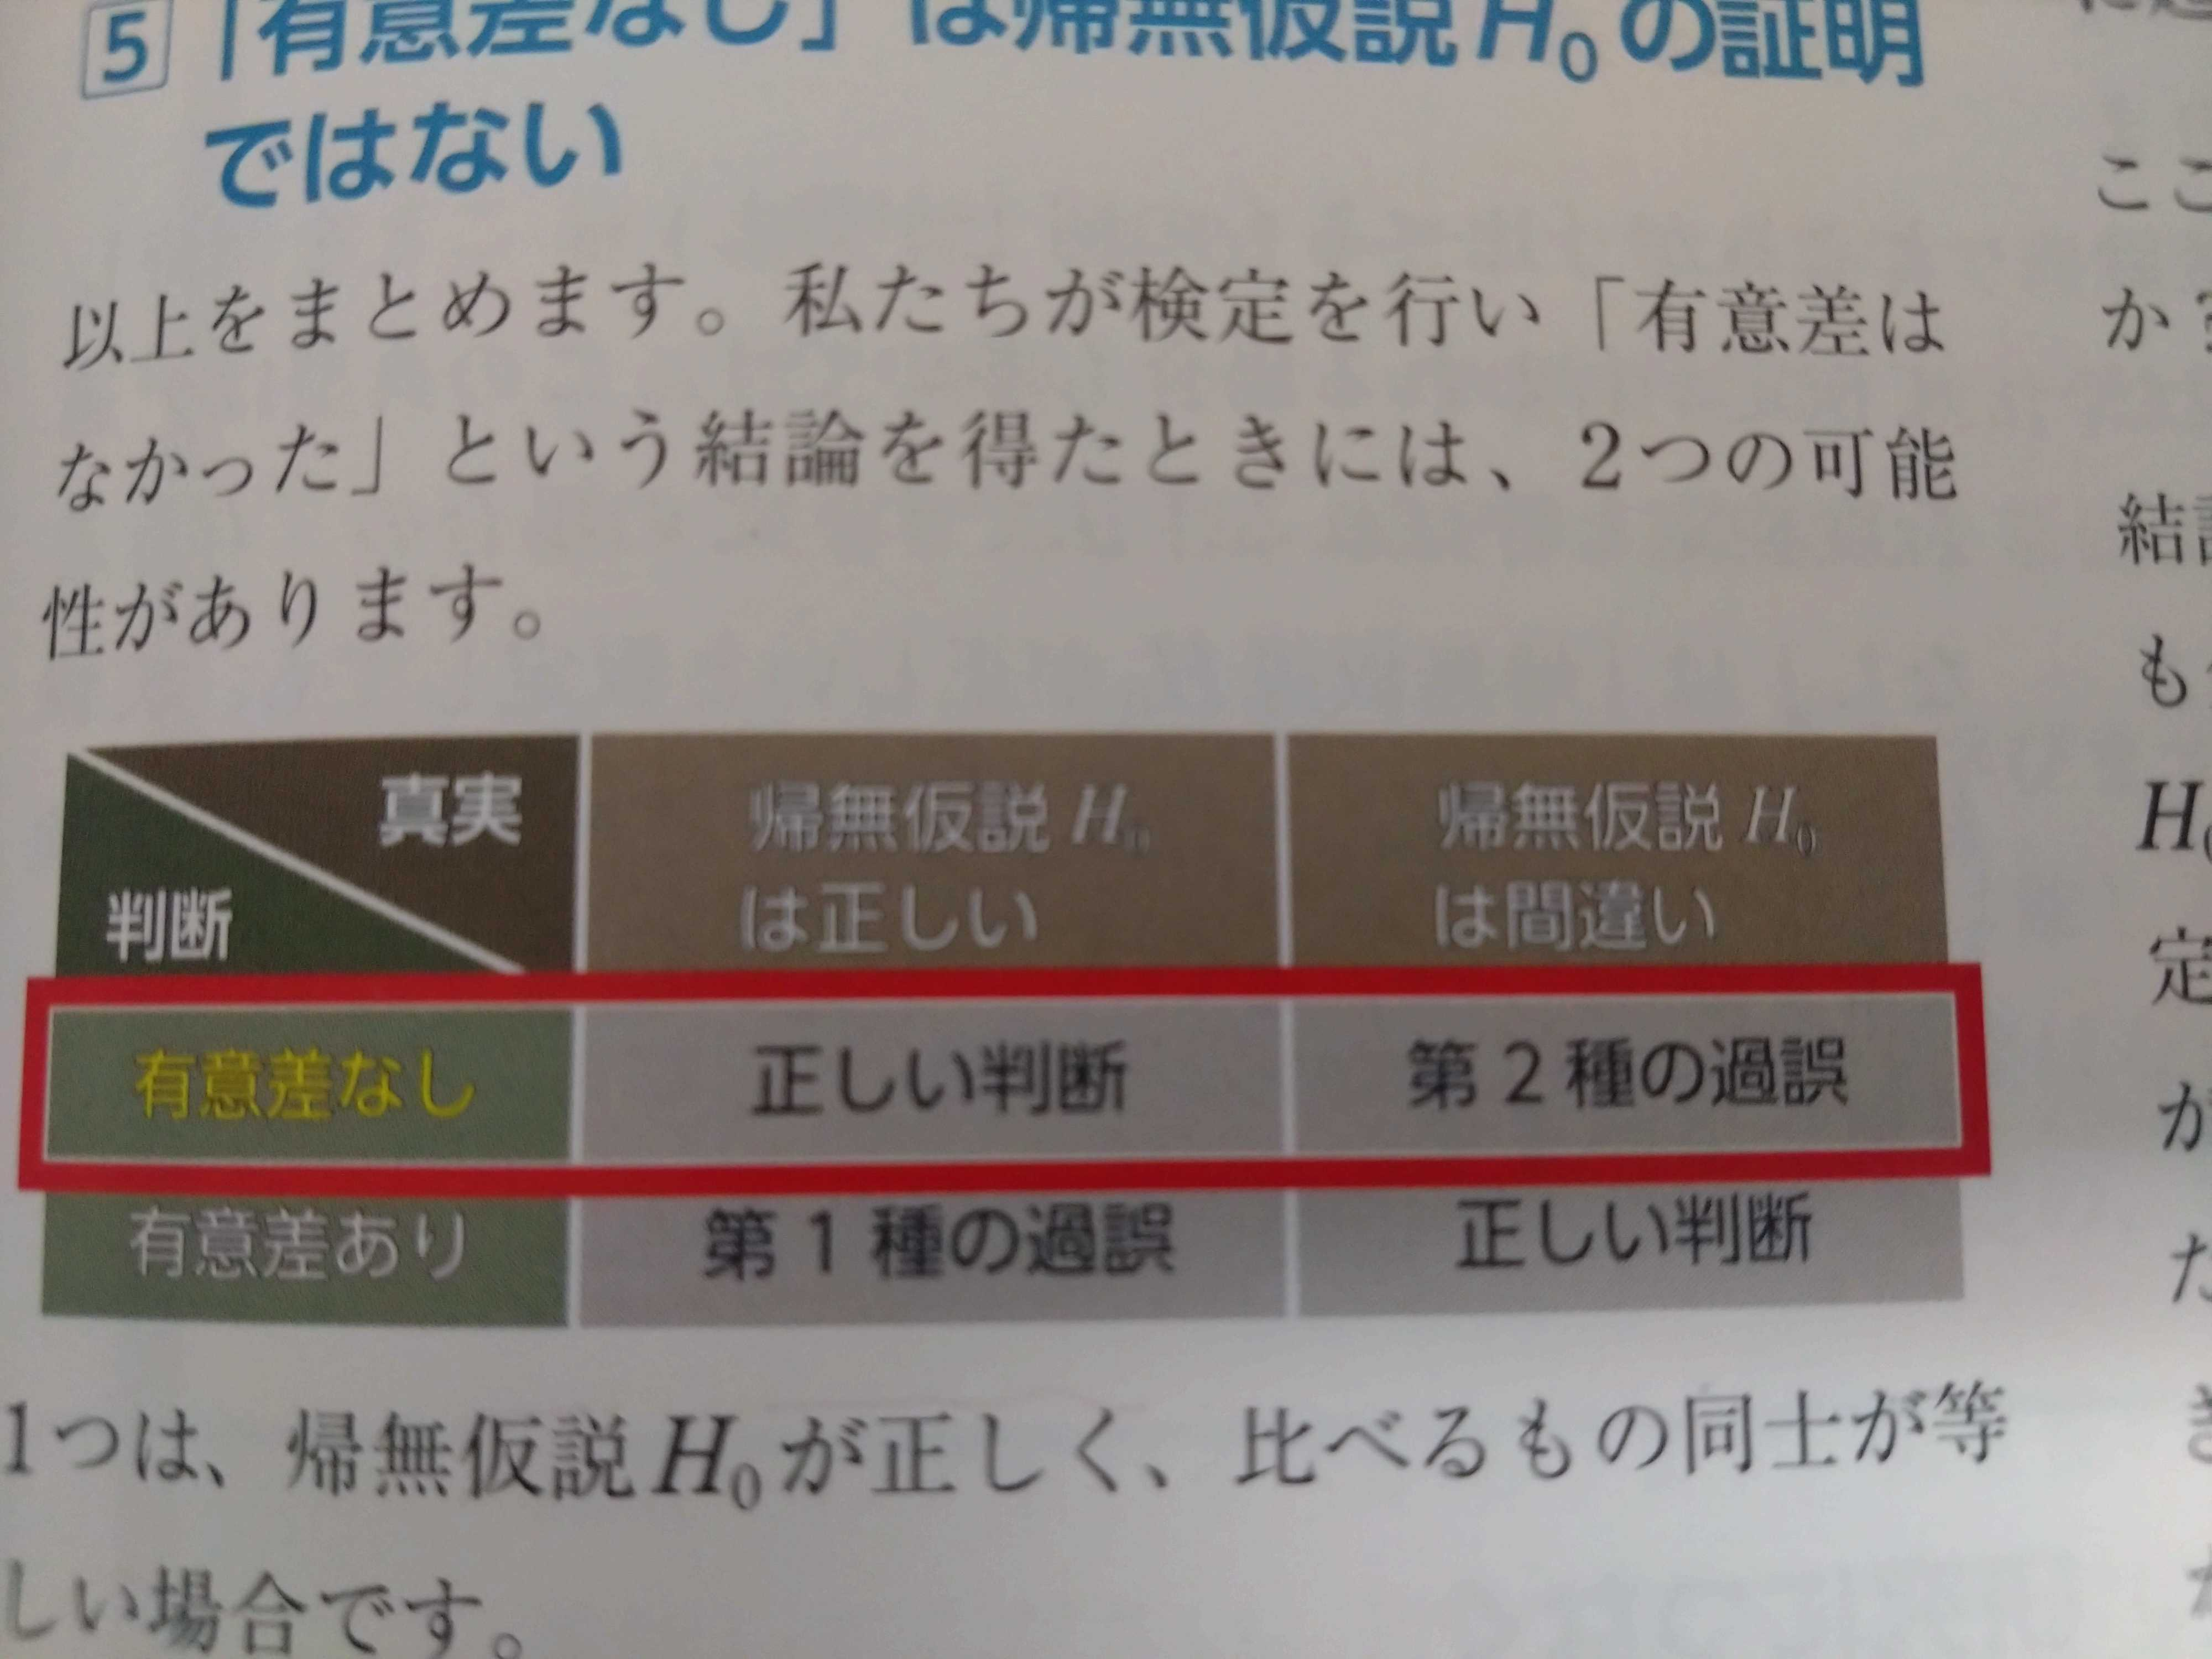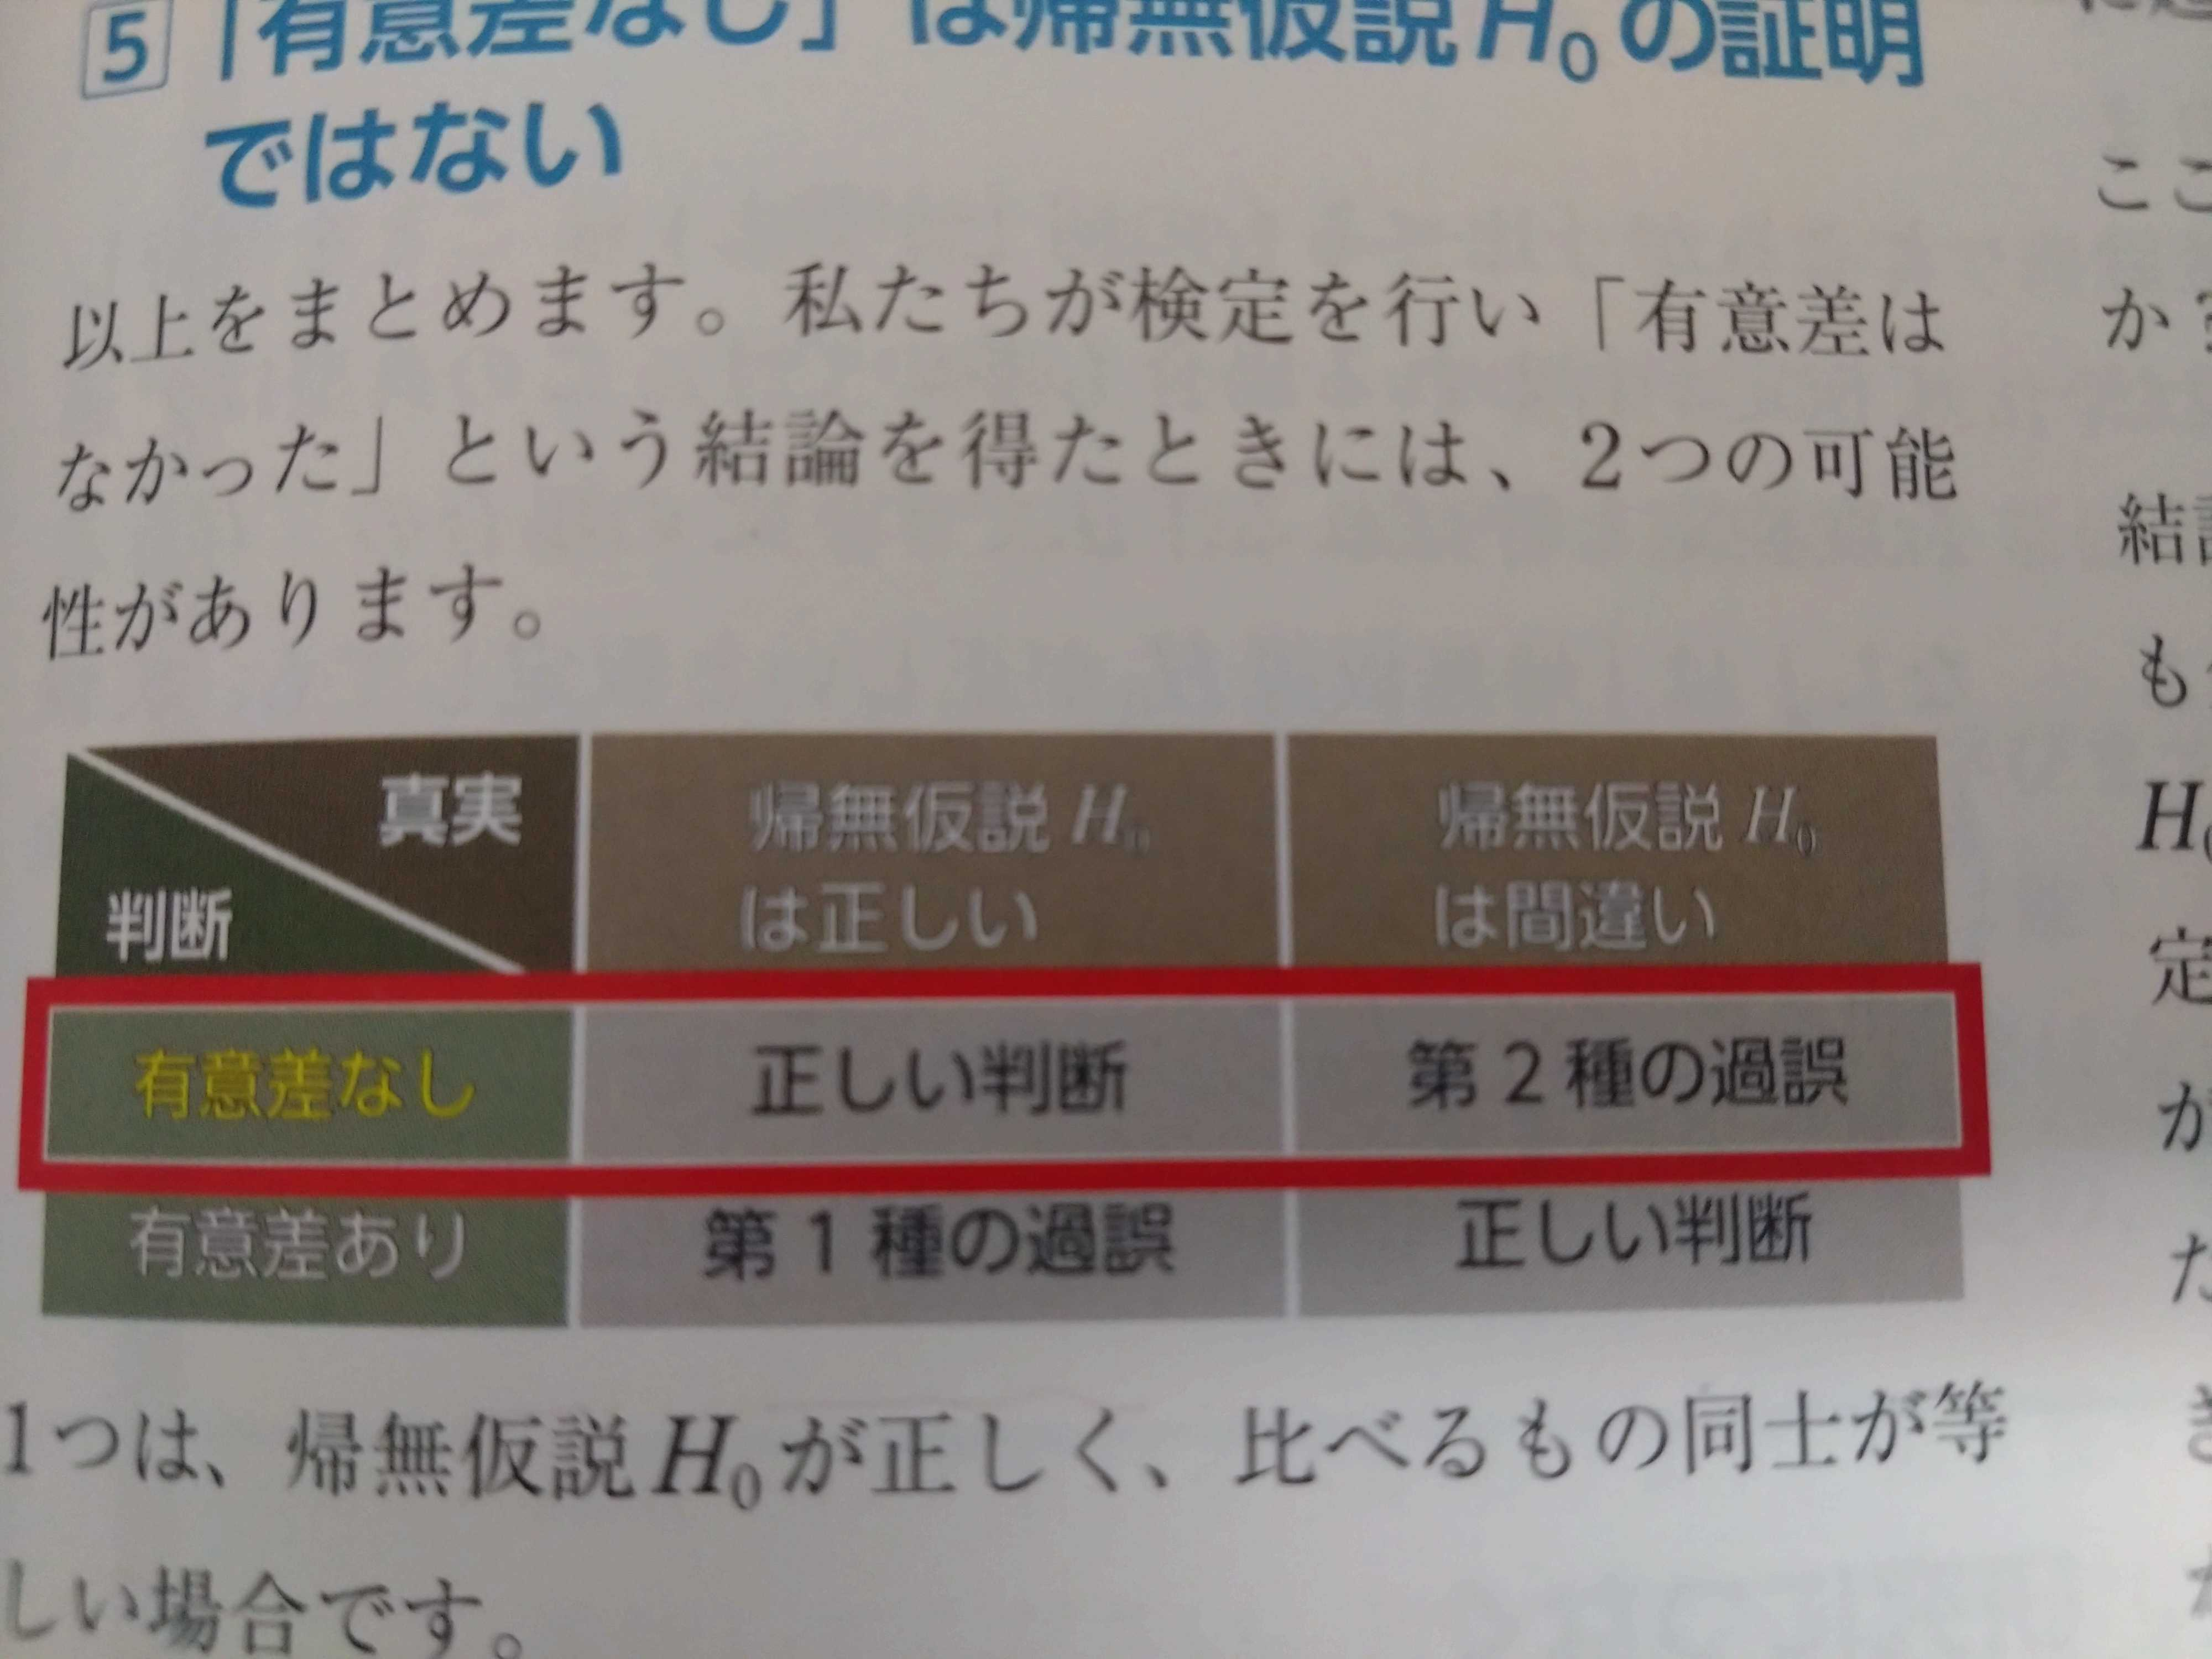)

In [3]:
# 肥満と肥満でない人の年収は違うかどうか？（数値の単位は１００万円）
group1 = [4.6, 5.6, 3.2, 3.2, 3.7, 4.0, 5.0, 4.6]
group2 = [4.6, 4.9, 7.1, 6.0, 5.2, 3.9, 5.3, 5.8]

p_value_manh = stats.mannwhitneyu(group1, group2, alternative="two-sided").pvalue
# 今回は年収が異なっているといえる。
print(p_value_manh)

0.03983261924474144


# 第1種の過誤と第2種の過誤に関して

### 第1種の過誤に関して
・第1種の過誤は、帰無仮説H_0が正しいのに正しくない（有意差あり）と判断する。</br>
→つまり有意水準のことを指す。（α=5%）</br>
→これは棄却域が5%なので、5%の確率で誤った判断をおこなってしまう。</br>


### 第2種の過誤に関して
・第2種の過誤は、帰無仮説H_0が正しくないのに正しい（有意差なし）と判断する。</br>
→検定統計量が棄却域に入る確率が低くなっている。</br>
→第2種の過誤は標本サイズなどに依存する。</br>
→検出力を 1-βで 表す。</br>

つまり！</br>
有意性あり→９５％の確率で差があるということができる。</br>
有意性なし→帰無仮説が正しいかもしれないし、間違っているかもしれない。(第2種の過誤の割合が大きいかもだから。。。)</br>

## 検出力
検出力は対立仮説が正しいとき、利用する検定によって帰無仮説を棄却する確率。</br>
→ちゃんと帰無仮説を棄却したい時は、検出力も考えないといけない。</br>
→統計学的に結論付けるために、帰無仮説を棄却したいと考えています。そのため、対立仮説が本当に正しいのであれば、できる限り、検出力を上げたいわけです。


## サンプルサイズに関して
サンプルサイズの設計には「有意水準」、「検出力」、「効果量」の情報が必要</br>
<注意></br>
サンプルサイズは多すぎてもだめ！</br>
→サンプルサイズが大きいほど、差や関連の検証精度が高まるため、わずかな差や関連がある程度でも「統計的に有意」だと示されやすくなる。</br>
→ごく僅かな差でも差があると言いたい場合は、サンプルサイズが多くなる。</br>
→サンプルサイズはchatgpt に任せていいと思う。

In [4]:
import math
from statsmodels.stats.power import normal_sample_size_one_tail

lower_n, upper_n = 10, 100000
alpha = 0.05
target_power = 0.8
p1 = 0.08
p2 = 0.10

while True:
    n = int((lower_n + upper_n) / 2)
    p = power(p1, p2, n, n, alpha)
    if p > target_power:
        upper_n = n
    else:
        lower_n = n
    if (upper_n - lower_n) <= 1:
        break

print (f"必要サンプルサイズ: {upper_n}")

20513.724895841624

# 標準正規分布とt分布の違い

・母分散がわかっている時→標準正規分布</br>
・母分散がわからない時→t分布（不偏分散を使用する。自由度は n-1）</br>
<解釈の注意></br>
・あくまでも標本平均$̄\bar{x}$は$N（μ、\frac{σ^2}{n}）$ に従う。ただ、検定統計量を算出する際に、$σ^2$(母分散)がわからないので不偏分散を使用する。</br>
 →この検定統計量がt分布に従う。t=$\frac{\bar{x} - μ}{\sqrt{\frac{s^2}{n}}}）$


<参考資料></br>
・[95%信頼区間にかんして](https://bellcurve.jp/statistics/course/8891.html)

# 2郡の検定
大きく二つに分類される。</br>
・対応のある検定</br>
・対応のない検定</br>


## 対応のある検定
・Aさんのある薬の服用前と服用後の差(d)を算出してそのdが正規分布に従うと仮定して分析を行なっていく。</br>
→標本平均$̄\bar{d}$も正規分布$N（μ、\frac{σ^2}{n}）$に従う。(基本的には$σ^2$（母分散）はわからんから不偏分散を使用する。それでt検定統計量を作成して行なっていく。)</br>
→帰無仮説は「標本平均$̄\bar{d}$は０」</br>
## 対応のない検定
・ある薬Aを服用したグループ(A)とある薬Bを服用したグループ(B)の「標本平均の差」を利用して分析を行なっていく。</br>

<仮定></br>
・グループA・グループBの母平均はそれぞれ正規分布に従う。</br>
・二つの正規分布は等しい母標準偏差を持つ（もし等分散性が期待できなかったらウェルチ検定を使用する）</br>
→標本平均$̄\bar{d}$も正規分布$N（μ、\frac{σ^2}{n}）$に従う。(基本的には$σ^2$（母分散）はわからんから不偏分散を使用する。それでt検定統計量を作成して行なっていく。)</br>
→帰無仮説は「標本平均$̄\bar{d}$は０」</br>